Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [2]:
import pandas as pd

file = 'Downloads/Dirt_Oval_B_and_above.csv'

df = pd.read_csv(file, encoding='latin-1')
df.head()

,Pos,Driver,Location,Region,Club,Starts,Wins,Avg Start,Avg Finish,Avg Pts per Race,...,Avg Field Size,Laps,Laps Lead,Avg Inc,Class,iRating,ttRating,Club Pts,Total Pts,CustId
0,1,Blake Matjoulis,US,Region 1,New York,854,533,3,2,139,...,14,31716,19687,1.31,P 4.99,9361,1350,14275,118383,273418
1,2,Dillon Semmelmann,US,Region 3,Midwest,1857,1183,2,3,135,...,15,60376,40022,2.19,P 3.49,9110,1329,10306,250122,270914
2,3,Evan Seay,US,Region 1,Carolina,935,320,4,4,117,...,14,34052,13097,1.90,P 4.37,8868,1235,5018,109414,330143
3,4,Alex A Bergeron,CA,Region 2,Canada,1397,898,3,2,127,...,14,46674,28271,1.52,P 4.52,8557,1377,29758,177230,246298
4,5,Zack McSwain,US,Region 1,Carolina,1030,513,3,3,131,...,14,37816,18810,1.21,P 4.47,8421,1299,4556,134695,366325


In [14]:
df.describe()


,Pos,Starts,Wins,Avg Start,Avg Finish,Avg Pts per Race,Top 25%,Avg Field Size,Laps,Laps Lead,Avg Inc,iRating,ttRating,Club Pts,Total Pts,CustId
count,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000
mean,5386.896360,154.527117,14.074944,6.920227,6.717868,45.966010,37.238484,12.524796,4100.139766,470.484770,2.873240,1780.911404,1297.476504,492.797455,8195.636701,276877.759937
std,3111.609175,231.940029,43.319058,1.528786,1.206884,17.414178,84.353903,1.143034,6629.678693,1492.877161,0.984858,895.945173,91.764452,1355.785293,16403.046353,137150.424173
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,89.000000,337.000000,0.000000,0.000000,18.000000
25%,2692.750000,39.000000,1.000000,6.000000,6.000000,35.000000,6.000000,12.000000,940.000000,40.000000,2.250000,1277.000000,1243.000000,35.000000,1597.750000,170264.500000
50%,5384.500000,84.000000,4.000000,7.000000,7.000000,43.000000,16.000000,13.000000,2034.000000,135.000000,2.840000,1542.000000,1350.000000,117.000000,3479.000000,292708.000000
75%,8082.250000,177.000000,12.000000,8.000000,7.000000,53.000000,36.000000,13.000000,4538.000000,375.000000,3.460000,2001.250000,1350.000000,379.000000,8157.250000,377386.750000
max,10777.000000,4169.000000,1203.000000,18.000000,18.000000,154.000000,2420.000000,19.000000,124603.000000,40536.000000,18.000000,9361.000000,2139.000000,29916.000000,451344.000000,538739.000000


In [15]:
df = df[df['Avg Start'] !=0]
df = df[df['Avg Finish'] !=0]
df = df[df['Total Pts'] !=0]

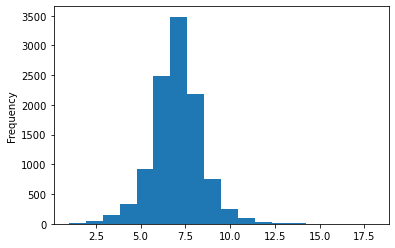

In [17]:
df['Avg Finish'].plot(kind='hist', bins=18)

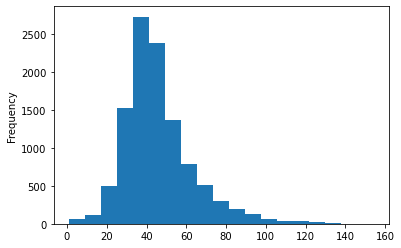

In [18]:
df['Avg Pts per Race'].plot(kind='hist', bins=19)

In [19]:
df['Avg Finish'].value_counts(normalize='True')

7     0.323940
6     0.231027
8     0.202753
5     0.085286
9     0.069661
4     0.030785
10    0.023065
3     0.013486
11    0.008464
2     0.004092
12    0.003162
13    0.001395
14    0.000930
1     0.000837
18    0.000372
16    0.000372
15    0.000279
17    0.000093
Name: Avg Start, dtype: float64

In [20]:
df.shape

(10752, 21)

In [21]:
# Predicting the average start as a classification question looks to be intriguing.  
# There are 18 classes, with 32 percent in the majority class (7th starting position.)
# Because of the balance, accuracy will be my target.

# Certain observations will be dropped, as they should have no bearing.  Such as, I believe, Location and Region.

In [29]:
df.columns

Index(['Pos', 'Driver', 'Location', 'Region', 'Club', 'Starts', 'Wins',
       'Avg Start', 'Avg Finish', 'Avg Pts per Race', 'Top 25%',
       'Avg Field Size', 'Laps', 'Laps Lead', 'Avg Inc', 'Class', 'iRating',
       'ttRating', 'Club Pts', 'Total Pts', 'CustId'],
      dtype='object')

In [ ]:
# import sklearn.model_selection as model_selection

# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=42)

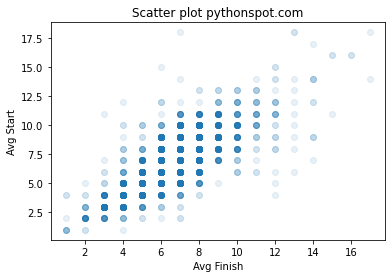

In [25]:
import matplotlib.pyplot as plt


X = df['Avg Start']
y = df['Avg Finish']



# Plot
plt.scatter(X, y, alpha=0.1)
plt.title('Start to Finish')
plt.xlabel('Avg Start')
plt.ylabel('Avg Finish')
plt.show()

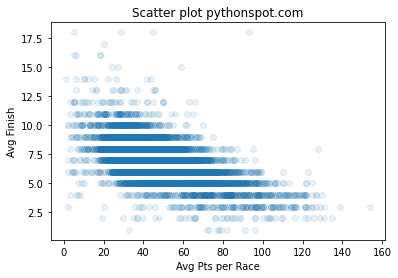

In [27]:
X = df['Avg Pts per Race']

plt.scatter(X, y, alpha=0.1)
plt.title('Points per Race to Finish')
plt.xlabel('Avg Pts per Race')
plt.ylabel('Avg Finish')
plt.show()

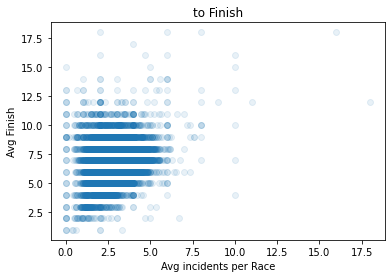

In [28]:
X = df['Avg Inc']

plt.scatter(X, y, alpha=0.1)
plt.title('Incidentsto Finish')
plt.xlabel('Avg incidents per Race')
plt.ylabel('Avg Finish')
plt.show()

# The coorellation here doesn't seem to be as strong as I had anticipated.